In [ ]:
!pip uninstall rpy2

In [ ]:
!pip install rpy2==3.5.1
!pip install dionysus
!pip install zarr
!pip install POT
!pip install gudhi
!pip install validclust
!pip install ipython-autotime

In [4]:
import sys
import os

py_file_location = "/content/drive/MyDrive/NASA/"
sys.path.append(os.path.abspath(py_file_location))

In [ ]:
from google.colab import drive
from google.colab import files
import os

drive.mount('/content/drive',force_remount=True)
os.chdir("/content/drive/MyDrive/NASA/")
!ls -ltr

In [6]:
import PD_vectorization_and_fire_index

Imported Successfully


In [38]:
import zarr
import seaborn as sns
import numpy as np
import scipy
import pandas as pd
import dionysus as d
import matplotlib.pyplot as plt
import gudhi as gd
import time
import math
from gudhi.wasserstein import wasserstein_distance as wd
from gudhi.representations import Landscape
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, pairwise_distances
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from validclust import dunn, cop, ValidClust
from gudhi.wasserstein.barycenter import lagrangian_barycenter
import gudhi
import rpy2
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
import rpy2.robjects.numpy2ri
rpy2.robjects.numpy2ri.activate()
sns.set_theme()
%load_ext autotime

time: 452 µs (started: 2024-01-08 18:24:49 +00:00)


In [8]:
fname2 = 'Tile_1_33'

rawFileList = os.listdir(fname2)
print (rawFileList)

['Tile_1_33.csv', 'Tile_1_33_s20192192041196.zarr', 'Tile_1_33_s20192191956196.zarr', 'Tile_1_33_s20192181816196.zarr', 'Tile_1_33_s20192182036196.zarr', 'Tile_1_33_s20192191821196.zarr', 'Tile_1_33_s20192192006196.zarr', 'Tile_1_33_s20192191931196.zarr', 'Tile_1_33_s20192181926196.zarr', 'Tile_1_33_s20192182151196.zarr', 'Tile_1_33_s20192192026196.zarr', 'Tile_1_33_s20192200236197.zarr', 'Tile_1_33_s20192201931196.zarr', 'Tile_1_33_s20192210116197.zarr', 'Tile_1_33_s20192210121197.zarr', 'Tile_1_33_s20192200056197.zarr', 'Tile_1_33_s20192201851196.zarr', 'Tile_1_33_s20192210221197.zarr', 'Tile_1_33 (1).gsheet', 'Tile_1_33.gsheet', 'Tile_1_33']


In [9]:
dfLabel = pd.read_csv(fname2 + '//' + rawFileList[0])
dfLabel['name'] = dfLabel.apply(lambda row: row.scene.split('_')[3], axis=1)
label = dfLabel.loc[dfLabel['name'] == 's20192210221197', 'fire'].iloc[0]
print (label)

0


In [10]:
temp_series = rawFileList[1:]
timeSeriesName = temp_series[0:17]
print(timeSeriesName)

['Tile_1_33_s20192192041196.zarr', 'Tile_1_33_s20192191956196.zarr', 'Tile_1_33_s20192181816196.zarr', 'Tile_1_33_s20192182036196.zarr', 'Tile_1_33_s20192191821196.zarr', 'Tile_1_33_s20192192006196.zarr', 'Tile_1_33_s20192191931196.zarr', 'Tile_1_33_s20192181926196.zarr', 'Tile_1_33_s20192182151196.zarr', 'Tile_1_33_s20192192026196.zarr', 'Tile_1_33_s20192200236197.zarr', 'Tile_1_33_s20192201931196.zarr', 'Tile_1_33_s20192210116197.zarr', 'Tile_1_33_s20192210121197.zarr', 'Tile_1_33_s20192200056197.zarr', 'Tile_1_33_s20192201851196.zarr', 'Tile_1_33_s20192210221197.zarr']


In [11]:
channel7List = []
channel7Name = []
for name in timeSeriesName:
    channelData = np.array(zarr.open(fname2 + '//' + name)[:, :, 6]) # select channel 7
    channel7List.append(channelData)
    channel7Name.append(name)
print(channel7List[0])
print (len(channel7List))

[[1.03710914 1.01520824 0.98079258 ... 1.00738645 0.98235685 0.91352546]
 [0.98235685 1.03398037 1.054317   ... 1.01833689 0.98861426 0.94324809]
 [0.98079258 1.03710914 1.05901003 ... 1.02772295 1.01207948 0.99800044]
 ...
 [1.50641441 1.45635521 1.43445432 ... 2.00544238 1.91940308 1.58932507]
 [1.40473163 1.40473163 1.39847422 ... 1.89906657 1.94912577 1.78643322]
 [1.45166218 1.46887004 1.42976117 ... 1.75045323 1.7520175  1.80520546]]
17


In [12]:
fname2 = 'Tiles_2021_2022'
rawFileList = os.listdir(fname2)
print (rawFileList)
print (len(rawFileList))

['Tile_1_33_20201650001177.zarr', 'Tile_1_33_20203240001174.zarr', 'Tile_1_33_20201000001176.zarr', 'Tile_1_33_20201520001177.zarr', 'Tile_1_33_20200550001176.zarr', 'Tile_1_33_20200610001176.zarr', 'Tile_1_33_20203080001176.zarr', 'Tile_1_33_20201210001177.zarr', 'Tile_1_33_20202690001176.zarr', 'Tile_1_33_20203050001176.zarr', 'Tile_1_33_20213360001177.zarr', 'Tile_1_33_20202130001177.zarr', 'Tile_1_33_20213400001177.zarr', 'Tile_1_33_20210010001177.zarr', 'Tile_1_33_20200020001215.zarr', 'Tile_1_33_20200360001177.zarr', 'Tile_1_33_20202510001177.zarr', 'Tile_1_33_20201330001177.zarr', 'Tile_1_33_20202240001177.zarr', 'Tile_1_33_20200810001176.zarr', 'Tile_1_33_20213580001178.zarr', 'Tile_1_33_20201070001177.zarr', 'Tile_1_33_20203230021173.zarr', 'Tile_1_33_20201430001177.zarr', 'Tile_1_33_20200660001176.zarr', 'Tile_1_33_20213430001177.zarr', 'Tile_1_33_20202470001177.zarr', 'Tile_1_33_20203340001177.zarr', 'Tile_1_33_20201270001177.zarr', 'Tile_1_33_20213350001177.zarr', 'Tile_1_3

In [13]:
csvName = 'Labels/Fire_Labels_2020-2021.csv'
dfLabel = pd.read_csv(csvName)[['fname', 'fire']]


label = dfLabel.loc[dfLabel['fname'] == 'Tile_1_33_20203370001177.zarr', 'fire'].iloc[0]
print (label)

0


In [15]:
channel7List = []
channel7Name = []
timeSeriesDict = {}

for name in rawFileList:
  if name.endswith(".zarr"):
    channelData = np.array(zarr.open(fname2 + '//' + name)[:, :, 0]) # select channel 7
    timeSeriesDict[name] = channelData
    channel7List.append(channelData)
    channel7Name.append(name)

print (len(channel7List))

425


In [ ]:
# plot channel 7 timeseries
fig, axs = plt.subplots(6, 5, figsize=(15, 30))

for i in range(6):
    for j in range(5):
        axs[i, j].imshow(channel7List[i* 5 + j], vmin=0, vmax=1) # vmin, vmax may change on different tiles
        label = dfLabel.loc[dfLabel['fname'] == channel7Name[i* 5 + j], 'fire'].iloc[0]
        axs[i, j].title.set_text('Label {}'.format(label))

plt.tight_layout()

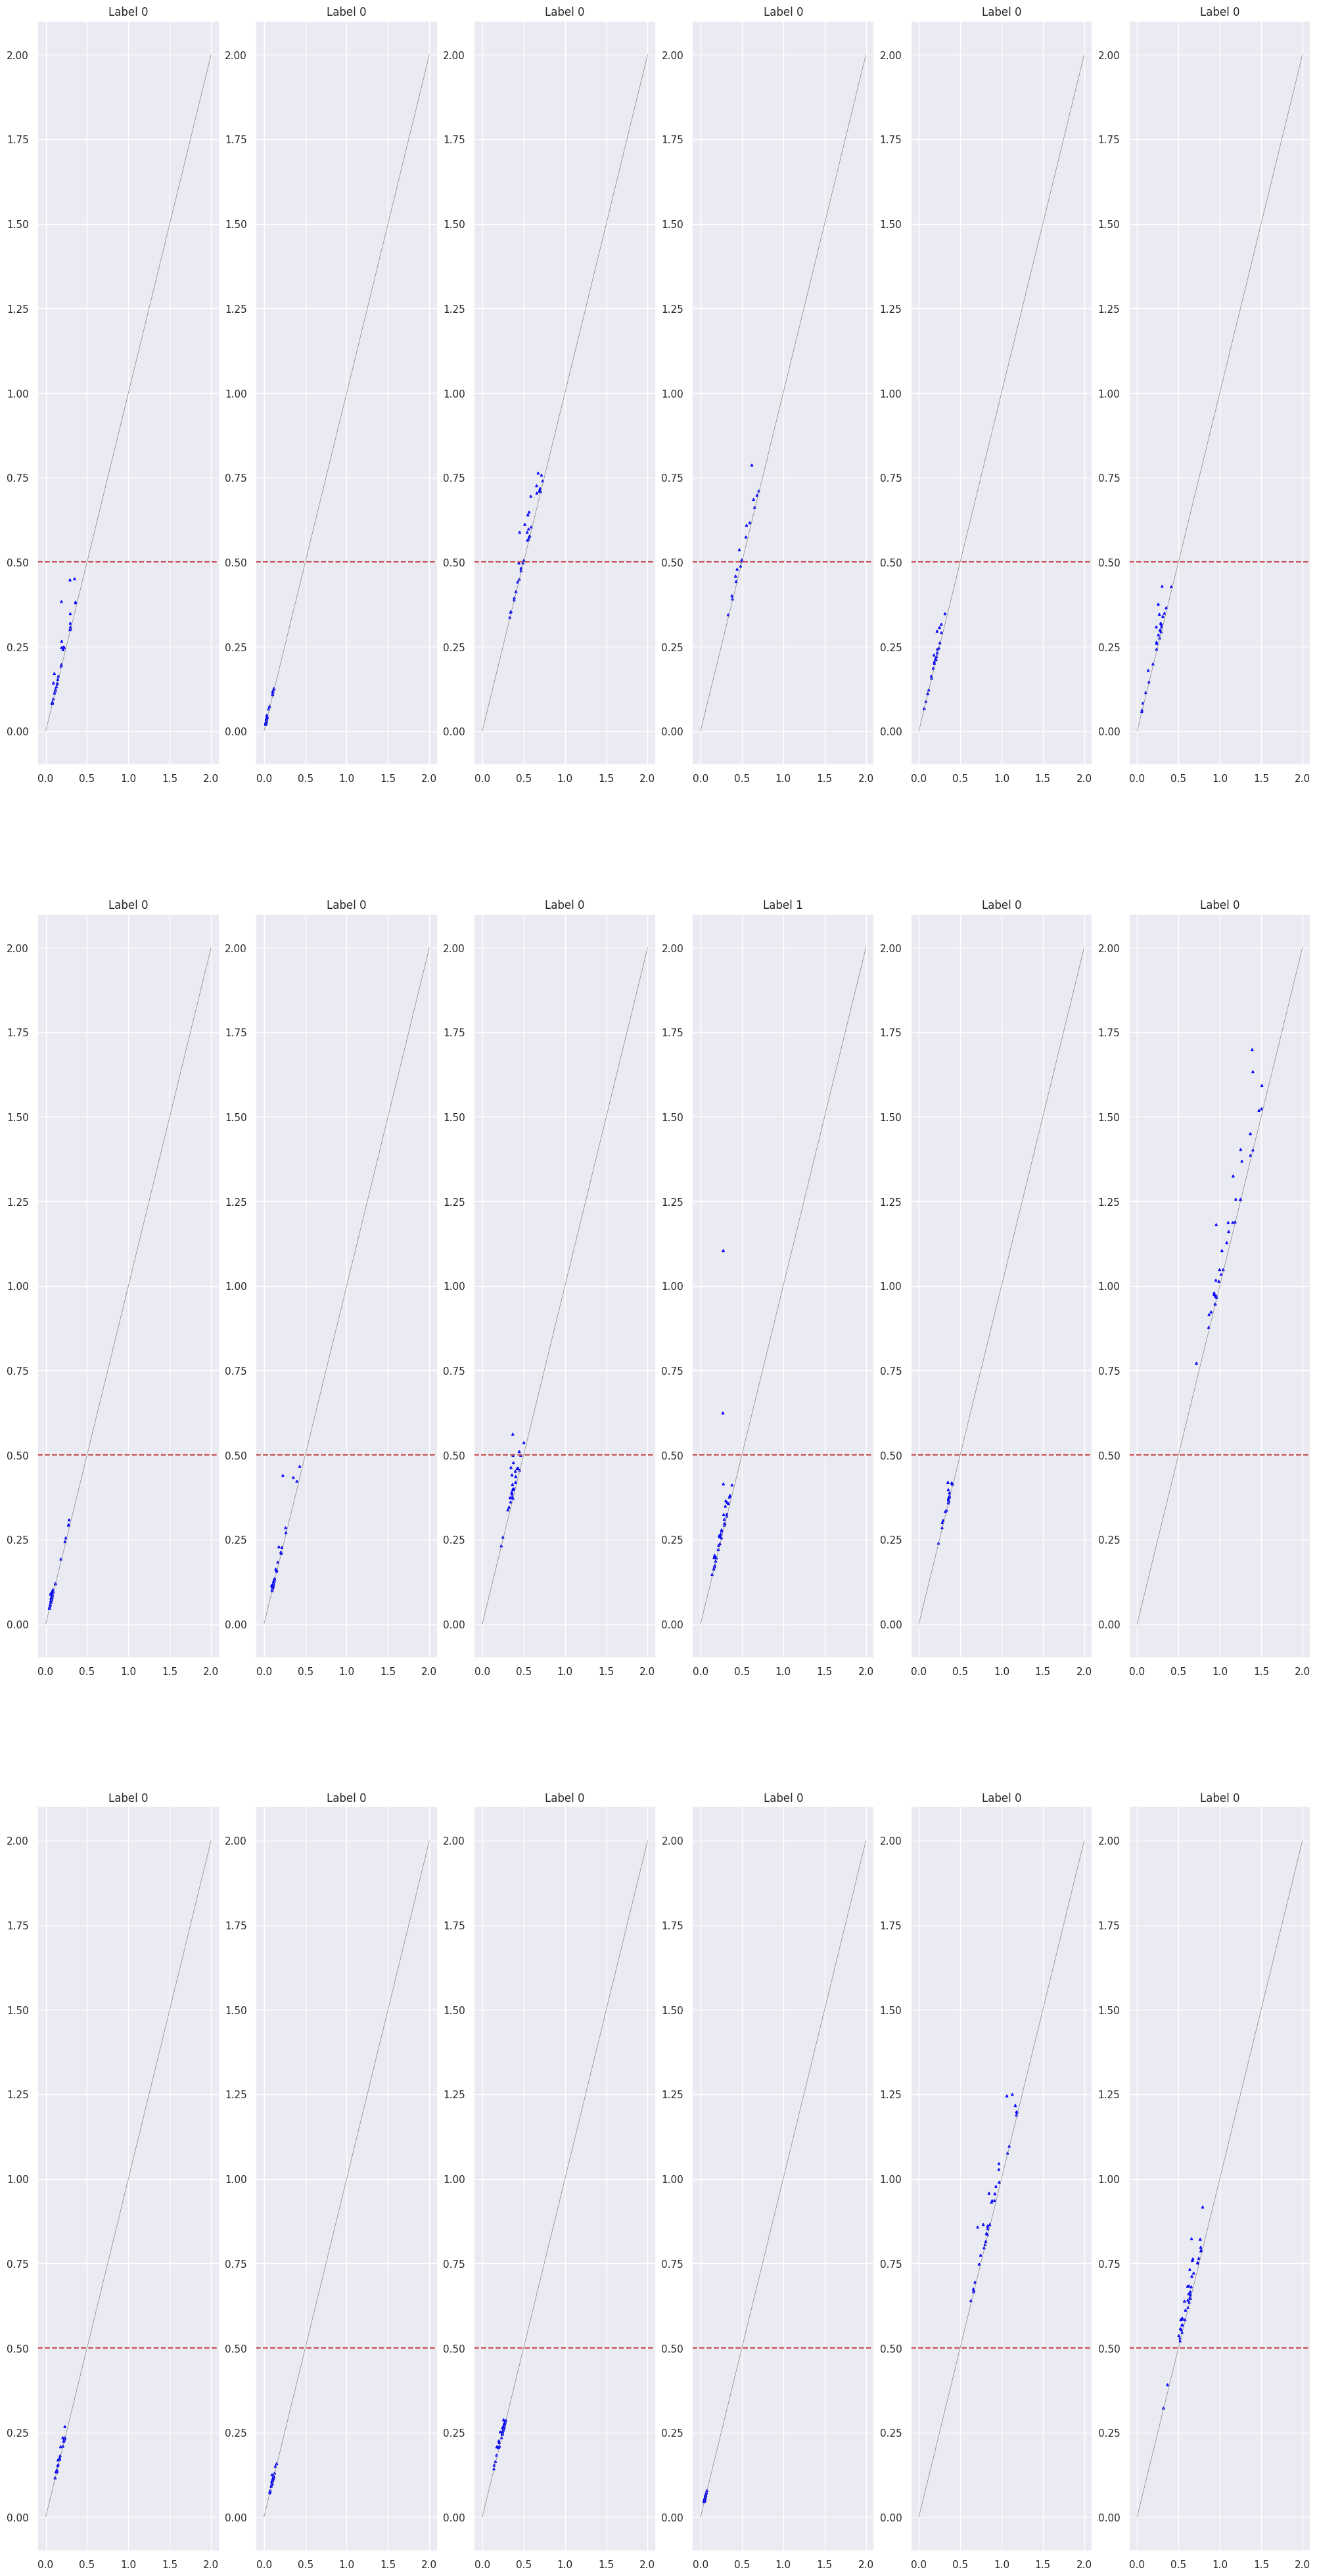

In [16]:
fig, axs = plt.subplots(3, 6, figsize=(25, 50))

pd0_union = []
pd1_union = []
groundTruth = []
for i in range(3):
    for j in range(6):
        lower_bound = 0
        upper_bound = 3

        p0, p1 = PD_vectorization_and_fire_index.extract_PD_arrays_with_freudenthal_triangulation(channel7List[i* 6 + j], lower_bound = lower_bound, upper_bound = upper_bound)
        pd0_union.append(p0)
        pd1_union.append(p1)
        #axs[i, j].scatter(birth0, death0, color='r', s=5, label = 'Dimension 0')
        axs[i, j].scatter(p1[0], p1[1], marker='^', s=5, facecolors='none', edgecolor='blue', label = 'Dimension 1')
        #axs[i, j].scatter(p0[0], p0[1], marker='^', s=5, facecolors='none', edgecolor='red', label = 'Dimension 0')
        axs[i, j].plot(np.arange(lower_bound, upper_bound), np.arange(lower_bound, upper_bound), '-', color='grey', lw=0.5)
        #axs[i, j].plot(np.arange(lower_bound, upper_bound), 2, '-', color='grey', lw=0.5)
        axs[i, j].axhline(y = 0.5, color='r', linestyle='--')

        label = dfLabel.loc[dfLabel['fname'] == channel7Name[i* 6 + j], 'fire'].iloc[0]
        groundTruth.append(label)
        axs[i, j].title.set_text('Label {}'.format(label))
        #axs[i, j].set_xlabel('Birth')
        #axs[i, j].set_ylabel('Death')

#plt.tight_layout()
#plt.show()

In [17]:
PDList = []
for i in pd1_union:
    temp = np.vstack((i[0], i[1])).T
    PDList.append(temp)

DDALPHA

In [ ]:
os.chdir("/content/drive/My Drive/NASA")
!ls -ltr

In [ ]:
r = robjects.r
r['source']('data_depth.R')

In [33]:
simplicial_volume = robjects.globalenv['simplicial_volume_list']
convex_hull_peeling = robjects.globalenv['convex_hull_peeling_list']
zoinoid = robjects.globalenv['zonoid_depth_list']
spatial = robjects.globalenv['spatial_depth_list']
mahalanobis = robjects.globalenv['mahalanobis_depth_list']
halfspace = robjects.globalenv['halfspace_depth_list']
halfspace_exact = robjects.globalenv['halfspace__exact_depth_list']
projection = robjects.globalenv['projection_depth_list']
simplicial = robjects.globalenv['simplicial_depth_list']

SilList = PD_vectorization_and_fire_index.PD2Silhoutte(PDList)

In [ ]:
print(SilList)

In [49]:
#Uncomment to make dummy data
#SilList = []
#for i in range(800):
 #  SilList.append(np.random.uniform(size = 3, low = 0, high = 10))

time: 25.6 ms (started: 2024-01-08 19:29:57 +00:00)


In [50]:
#Pass silList to R
m = robjects.r['matrix'](SilList, nrow=len(SilList), ncol=3) #specify number of columns and rows

time: 175 ms (started: 2024-01-08 19:29:59 +00:00)


In [51]:
# Simplicial Volume
temp_list = simplicial_volume(m, len(SilList), 3)
list_r = []
for i in temp_list:
  list_r.append(i[0])
simplexVolDepthList = list_r
#fig, axs = plt.subplots(3, 6, figsize=(21, 15))
#for i in range(3):
   # for j in range(6):
       # if i* 6 + j <= 16:
           # axs[i, j].plot(SilList[i*6 + j])
           # axs[i, j].set_ylim(0, 1)
            #axs[i, j].title.set_text('Label {}, Data Depth {:.3f}'.format(groundTruth[i*6 + j], simplexVolDepthList[i*6 + j]))

#plt.tight_layout()
#plt.show()

time: 12min 37s (started: 2024-01-08 19:30:00 +00:00)
